# C7M3 Notebook 1: Exploratory Data Analysis

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("datasets/new_auto.csv", index_col = 0)

In [3]:
df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,horsepower,peak_rpm,city_kmpl,highway_kmpl,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,13495.0,False,True,True,False,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,16500.0,False,True,True,False,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,8.08,11.05,16500.0,False,True,True,False,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,10.20,12.76,13950.0,False,True,True,False,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,7.65,9.35,17450.0,False,True,True,False,low


In [4]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_kmpl            float64
highway_kmpl         float64
price                float64
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration_std          bool
aspiration_turbo        bool
horsepower_binned     object
dtype: object

In [5]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_kmpl,highway_kmpl,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,10.705075,13.047463,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,2.730818,2.898625,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5.530000,6.800000,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,8.080000,10.630000,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,10.200000,12.760000,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.760000,14.460000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,20.830000,22.960000,45400.000000


In [6]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_kmpl', 'highway_kmpl', 'price',
       'fuel-type-diesel', 'fuel-type-gas', 'aspiration_std',
       'aspiration_turbo', 'horsepower_binned'],
      dtype='object')

## EDA

### Contineous Numerical Variables

(0.0, 53497.20125616042)

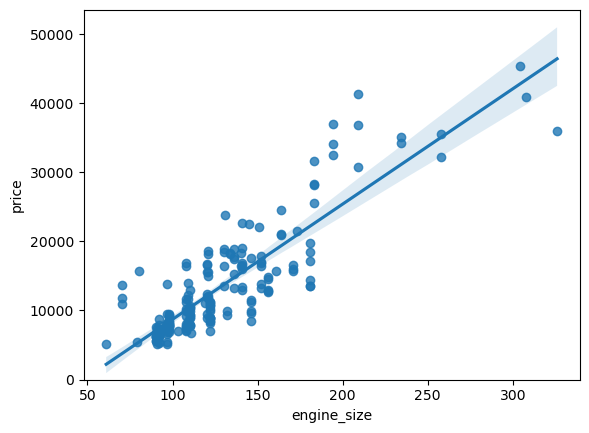

In [7]:
# positive linear relationship
# comparing engine size with price
sns.regplot(x = "engine_size", y = "price", data = df)
plt.ylim(0,)

In [8]:
df[["engine_size", "price"]].corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway_kmpl', ylabel='price'>

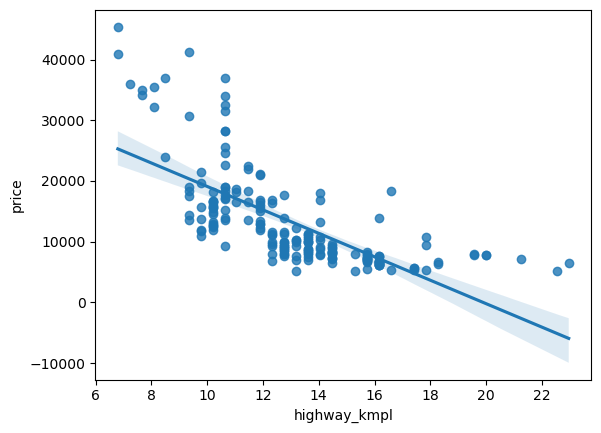

In [9]:
#------------------------
# Negative Correlation
# highway_kmpl vs price
sns.regplot(x = "highway_kmpl", y = "price", data = df)

In [10]:
df[["highway_kmpl", "price"]].corr()

,highway_kmpl,price
highway_kmpl,1.000000,-0.704818
price,-0.704818,1.000000


<Axes: xlabel='peak_rpm', ylabel='price'>

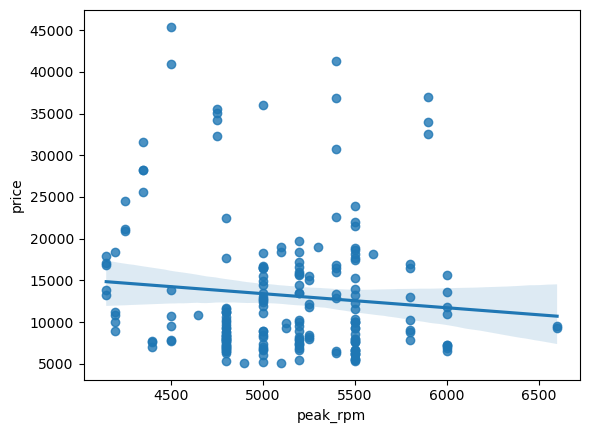

In [11]:
#---------------------------
# Weak Linear Relationship
# Peak_rpm vs price
sns.regplot(x = "peak_rpm", y = "price", data = df)

In [12]:
df[["peak_rpm", "price"]].corr()

,peak_rpm,price
peak_rpm,1.000000,-0.101616
price,-0.101616,1.000000


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


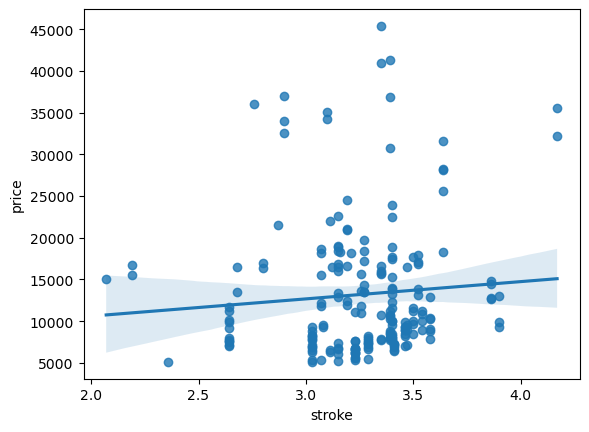

In [13]:
# stroke vs price
sns.regplot(x = "stroke", y = "price", data = df)
df[["stroke", "price"]].corr()

--------------
### Categorical Variables

<Axes: xlabel='body_style', ylabel='price'>

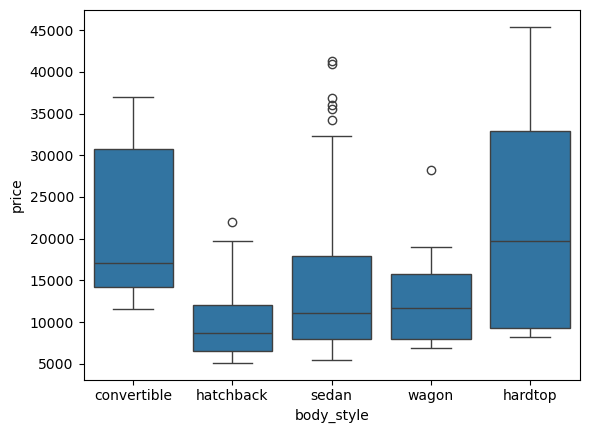

In [14]:
# body_style vs price
# using boxplot
sns.boxplot(x = "body_style", y = "price", data =df)

<Axes: xlabel='engine_location', ylabel='price'>

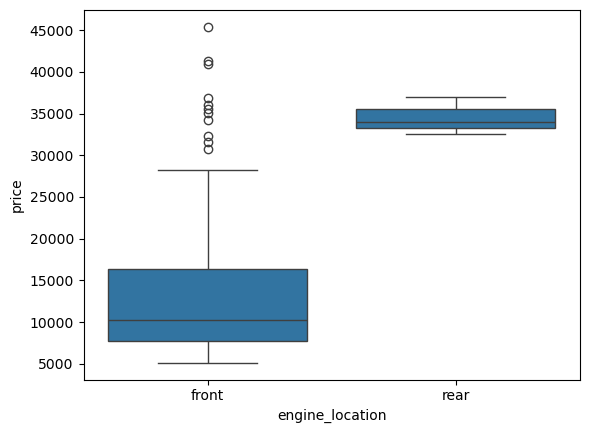

In [15]:
# engine_location vs price
sns.boxplot(x = "engine_location", y = "price", data = df)

<Axes: xlabel='drive_wheels', ylabel='price'>

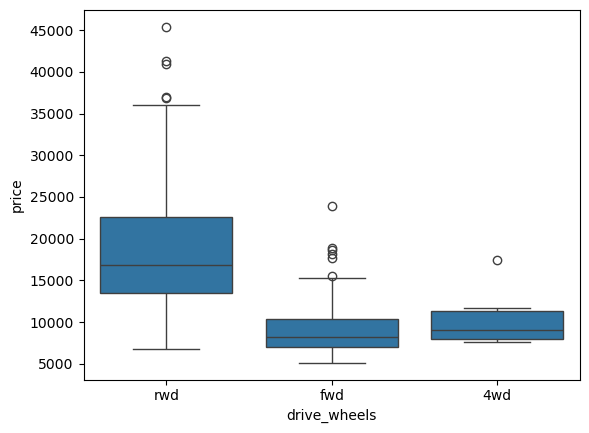

In [16]:
# drive_wheels vs price
sns.boxplot(x= "drive_wheels", y = "price", data = df)

-----------
### Descriptive Statistical Analysis

In [17]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_kmpl,highway_kmpl,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,10.705075,13.047463,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,2.730818,2.898625,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5.530000,6.800000,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,8.080000,10.630000,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,10.200000,12.760000,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.760000,14.460000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,20.830000,22.960000,45400.000000


In [18]:
df.describe(include=[object])

,make,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,horsepower_binned
count,201,199,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,113,94,118,198,145,157,92,153


In [19]:
# value_counts() 
# drive_wheels
df["drive_wheels"].value_counts()

drive_wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [20]:
df["drive_wheels"].value_counts().to_frame()

,count
drive_wheels,
fwd,118
rwd,75
4wd,8


In [21]:
# making it look cool
drive_wheels_counts = df['drive_wheels'].value_counts().to_frame() # loading to df
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts=drive_wheels_counts.rename(columns={'drive_wheels': 'value_counts'})  # renaming drive_wheels
drive_wheels_counts.index.name = 'drive_wheels'   # renaming index
drive_wheels_counts

,value_counts,count
drive_wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [22]:
engine_loc_counts = df["engine_location"].value_counts().to_frame()
engine_loc_counts.reset_index(inplace = True)
engine_loc_counts = engine_loc_counts.rename(columns = {"engine_location":"value_counts"})
engine_loc_counts.index.name = "engine_location"
engine_loc_counts

,value_counts,count
engine_location,,
0,front,198
1,rear,3


 ### Groupby

In [23]:
df["drive_wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [24]:
df1 = df[["drive_wheels", "body_style", "price"]]

In [25]:
df1_grouped = df1.groupby(["drive_wheels"], as_index = False).agg({"price":"mean"})
df1_grouped

,drive_wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [26]:
df1_grouped1 = df1.groupby(["drive_wheels", "body_style"], as_index = False).agg({"price":"mean"})
df1_grouped1

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [27]:
# pivot table
df1_grouped1_pivot = df1_grouped1.pivot(index = "drive_wheels", columns = "body_style")
df1_grouped1_pivot = df1_grouped1_pivot.fillna(0)
df1_grouped1_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [28]:
#----------------
df1_grouped2 = df1.groupby(["body_style"], as_index = False).agg({"price":"mean"})
df1_grouped2

,body_style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


-----------
### Heatmaps

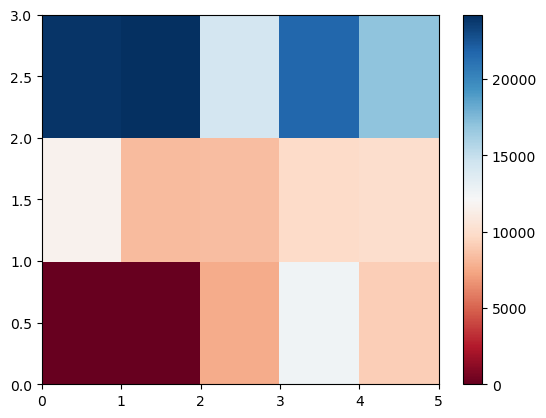

In [29]:
#use the grouped results
plt.pcolor(df1_grouped1_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

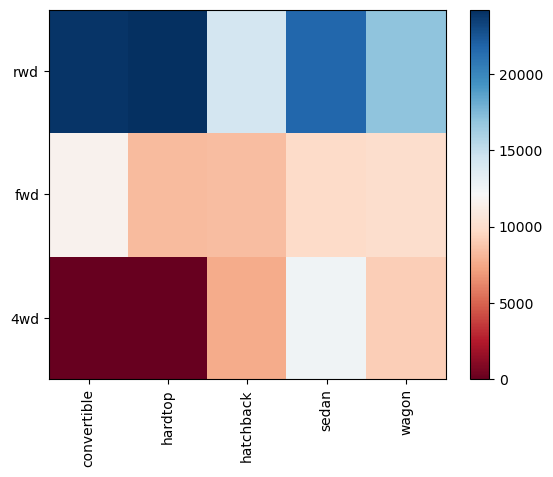

In [30]:
# to make it understandable
fig, ax = plt.subplots()
im = ax.pcolor(df1_grouped1_pivot, cmap='RdBu')

#label names
row_labels = df1_grouped1_pivot.columns.levels[1]
col_labels = df1_grouped1_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df1_grouped1_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df1_grouped1_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

------------
------------
### Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


In [31]:
# calculating correlation using df.corr() in numerical columns

num_df = df.select_dtypes(include = [float, int])
num_df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_kmpl,highway_kmpl,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035498,0.036276,-0.082391
normalized_losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225080,-0.181910,0.133999
wheel_base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470694,-0.543442,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665257,-0.698321,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633559,-0.680725,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049893,-0.104997,0.135486
curb_weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749605,-0.795029,0.834415
engine_size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650604,-0.679641,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582156,-0.591396,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033998,-0.034486,0.082269


In [32]:
# for distinct columns
df[["bore", "stroke", "compression_ratio", "horsepower"]].corr()

,bore,stroke,compression_ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression_ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [33]:
#wheel_base vs.price
pearson_coef, p_value = stats.pearsonr(df['wheel_base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732885e-20


In [34]:
#horsepoer vs.price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P = 6.369057428259557e-48


In [36]:
#length vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466158868e-30


In [38]:
#width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.20033551048144e-38


In [39]:
#curb_weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb_weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P = 2.189577238893965e-53


In [40]:
#engine_size vs price
pearson_coef, p_value = stats.pearsonr(df['curb_weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P = 2.189577238893965e-53


In [43]:
#bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P = 8.049189483935315e-17


In [41]:
#city_kmpl vs price
pearson_coef, p_value = stats.pearsonr(df['city_kmpl'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6866114302559206  with a P-value of P = 2.2968729706603968e-29


In [42]:
#highway_kmpl vs price
pearson_coef, p_value = stats.pearsonr(df['highway_kmpl'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.704818277493116  with a P-value of P = 1.6888861803531748e-31


--------------
Thank You!!!